<a href="https://colab.research.google.com/github/chiranjeevi-manike/IBM-Cognitiveclass.ai/blob/main/BLI_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from matplotlib import pyplot as plt
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BLI/BLI2014_16082020095401811.csv')

In [ ]:
df.shape

(3390, 17)

In [ ]:
df.columns

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

In [ ]:
df = df[['Country','Indicator','Inequality','Unit','Value']]

In [ ]:
df.shape

(3390, 5)

In [ ]:
df.head()

,Country,Indicator,Inequality,Unit,Value
0,Australia,Dwellings without basic facilities,Total,Percentage,1.1
1,Austria,Dwellings without basic facilities,Total,Percentage,1.0
2,Belgium,Dwellings without basic facilities,Total,Percentage,1.9
3,Canada,Dwellings without basic facilities,Total,Percentage,0.2
4,Czech Republic,Dwellings without basic facilities,Total,Percentage,0.9


In [ ]:
df = df[df['Inequality'] == 'Total']
df = df[df['Country'] != 'OECD — Total']

In [ ]:
df.head()

,Country,Indicator,Inequality,Unit,Value
0,Australia,Dwellings without basic facilities,Total,Percentage,1.1
1,Austria,Dwellings without basic facilities,Total,Percentage,1.0
2,Belgium,Dwellings without basic facilities,Total,Percentage,1.9
3,Canada,Dwellings without basic facilities,Total,Percentage,0.2
4,Czech Republic,Dwellings without basic facilities,Total,Percentage,0.9


In [ ]:
pivot_table = pd.pivot_table(df, index=['Country'], columns=['Indicator'], values='Value')

In [ ]:
pivot_table.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,74.0,14.23,72.0,0.8,31197.0,38482.0,20.0,4.4,82.0,7.4,1.06,46585.0,93.0,2.3,85.0,514.0,14.41,93.0,93.0,18.8
Austria,27.0,3.4,7.1,1.0,82.0,8.61,73.0,0.5,29256.0,48125.0,21.0,3.4,81.1,7.5,1.07,43837.0,95.0,1.6,69.0,498.0,14.46,75.0,95.0,16.9
Belgium,21.0,6.6,4.5,1.9,71.0,4.41,62.0,1.2,27811.0,78368.0,20.0,4.5,80.5,7.1,3.37,47276.0,91.0,2.3,74.0,507.0,15.71,89.0,84.0,18.8
Brazil,18.0,7.9,4.0,6.7,43.0,10.74,67.0,25.5,10310.0,6875.0,21.0,4.8,73.4,7.2,2.17,7909.0,90.0,1.4,69.0,406.0,14.97,79.0,67.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.98,72.0,1.7,30212.0,63261.0,22.0,6.6,81.0,7.6,0.90,44017.0,94.0,2.5,88.0,522.0,14.25,61.0,90.0,17.0


In [ ]:
pivot_table.columns

Index(['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Life satisfaction', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education'],
      dtype='object', name='Indicator')

In [ ]:
pivot_table.to_csv('BLI_2014.csv')

In [ ]:
df = pd.read_csv('/content/BLI_2014.csv')

In [ ]:
df = df.drop(columns=['Country'])

In [ ]:
array = df.values

In [ ]:
X = df.drop(['Life satisfaction'],axis=1)
y = df['Life satisfaction']

In [ ]:
colnames = ['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education']

In [ ]:
df_before_scale = pd.DataFrame(X, columns=colnames)

df_before_scale.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
0,13.0,2.1,10.5,1.1,74.0,14.23,72.0,0.8,31197.0,38482.0,20.0,4.4,82.0,1.06,46585.0,93.0,2.3,85.0,514.0,14.41,93.0,93.0,18.8
1,27.0,3.4,7.1,1.0,82.0,8.61,73.0,0.5,29256.0,48125.0,21.0,3.4,81.1,1.07,43837.0,95.0,1.6,69.0,498.0,14.46,75.0,95.0,16.9
2,21.0,6.6,4.5,1.9,71.0,4.41,62.0,1.2,27811.0,78368.0,20.0,4.5,80.5,3.37,47276.0,91.0,2.3,74.0,507.0,15.71,89.0,84.0,18.8
3,18.0,7.9,4.0,6.7,43.0,10.74,67.0,25.5,10310.0,6875.0,21.0,4.8,73.4,2.17,7909.0,90.0,1.4,69.0,406.0,14.97,79.0,67.0,16.3
4,15.0,1.3,10.5,0.2,89.0,3.98,72.0,1.7,30212.0,63261.0,22.0,6.6,81.0,0.90,44017.0,94.0,2.5,88.0,522.0,14.25,61.0,90.0,17.0


In [ ]:
y.head()

0    7.4
1    7.5
2    7.1
3    7.2
4    7.6
Name: Life satisfaction, dtype: float64

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
rescaledX = scaler.fit_transform(X)

In [ ]:
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.108 0.07  0.895 0.073 0.677 0.326 0.742 0.02  0.715 0.272 0.562 0.107
  0.942 0.073 0.835 0.893 0.875 0.917 0.818 0.375 1.    0.925 0.839]
 [0.486 0.183 0.537 0.066 0.806 0.196 0.774 0.008 0.648 0.346 0.625 0.04
  0.877 0.074 0.776 0.964 0.438 0.65  0.697 0.394 0.591 0.962 0.5  ]
 [0.324 0.461 0.263 0.126 0.629 0.098 0.419 0.036 0.599 0.58  0.562 0.114
  0.833 0.234 0.85  0.821 0.875 0.733 0.765 0.867 0.909 0.755 0.839]
 [0.243 0.574 0.211 0.444 0.177 0.245 0.581 1.    0.    0.027 0.625 0.134
  0.319 0.15  0.    0.786 0.312 0.65  0.    0.587 0.682 0.434 0.393]
 [0.162 0.    0.895 0.013 0.919 0.088 0.742 0.056 0.681 0.463 0.688 0.255
  0.87  0.062 0.78  0.929 1.    0.967 0.879 0.314 0.273 0.868 0.518]]


In [ ]:
X.columns

Index(['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education'],
      dtype='object')

In [ ]:
# read into data frame
colnames = ['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education']

In [ ]:
df_scaled = pd.DataFrame(rescaledX, columns=colnames)

df_scaled.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
0,0.108108,0.069565,0.894737,0.072848,0.677419,0.326067,0.741935,0.019841,0.714794,0.271534,0.5625,0.107383,0.942029,0.073120,0.835245,0.892857,0.8750,0.916667,0.818182,0.375000,1.000000,0.924528,0.839286
1,0.486486,0.182609,0.536842,0.066225,0.806452,0.195733,0.774194,0.007937,0.648369,0.345994,0.6250,0.040268,0.876812,0.073816,0.775899,0.964286,0.4375,0.650000,0.696970,0.393939,0.590909,0.962264,0.500000
2,0.324324,0.460870,0.263158,0.125828,0.629032,0.098330,0.419355,0.035714,0.598919,0.579522,0.5625,0.114094,0.833333,0.233983,0.850167,0.821429,0.8750,0.733333,0.765152,0.867424,0.909091,0.754717,0.839286
3,0.243243,0.573913,0.210526,0.443709,0.177419,0.245130,0.580645,1.000000,0.000000,0.027474,0.6250,0.134228,0.318841,0.150418,0.000000,0.785714,0.3125,0.650000,0.000000,0.587121,0.681818,0.433962,0.392857
4,0.162162,0.000000,0.894737,0.013245,0.919355,0.088358,0.741935,0.055556,0.681086,0.462870,0.6875,0.255034,0.869565,0.061978,0.779786,0.928571,1.0000,0.966667,0.878788,0.314394,0.272727,0.867925,0.517857


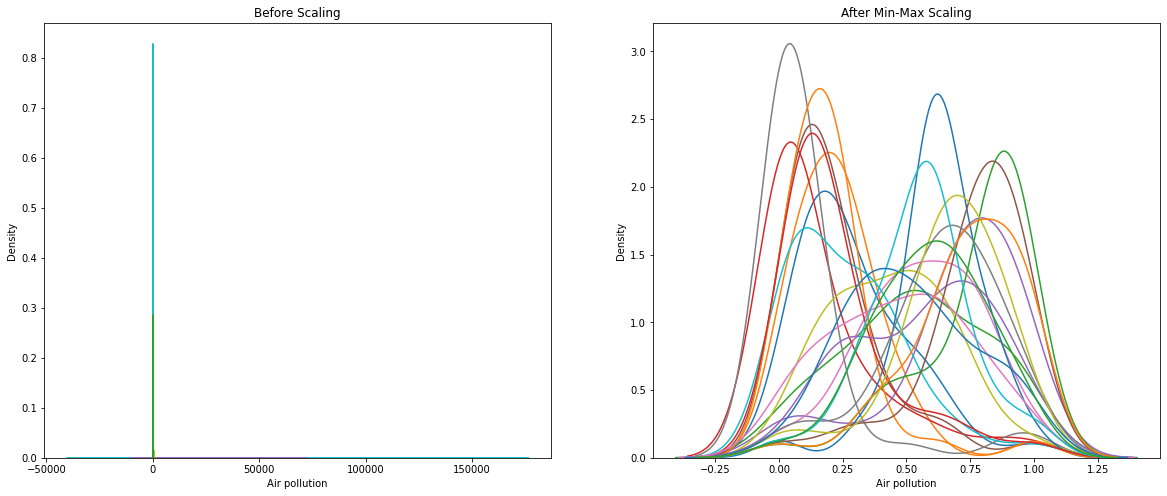

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))

ax1.set_title('Before Scaling')
sns.kdeplot(df_before_scale['Air pollution'], ax=ax1)
sns.kdeplot(df_before_scale['Assault rate'], ax=ax1)
sns.kdeplot(df_before_scale['Consultation on rule-making'], ax=ax1)
sns.kdeplot(df_before_scale['Dwellings without basic facilities'], ax=ax1)
sns.kdeplot(df_before_scale['Educational attainment'], ax=ax1)
sns.kdeplot(df_before_scale['Employees working very long hours'], ax=ax1)
sns.kdeplot(df_before_scale['Employment rate'], ax=ax1)
sns.kdeplot(df_before_scale['Homicide rate'],  ax=ax1)
sns.kdeplot(df_before_scale['Household net adjusted disposable income'],  ax=ax1)
sns.kdeplot(df_before_scale['Household net financial wealth'],  ax=ax1)
sns.kdeplot(df_before_scale['Housing expenditure'],  ax=ax1)
sns.kdeplot(df_before_scale['Job security'],  ax=ax1)
sns.kdeplot(df_before_scale['Life expectancy'],  ax=ax1)
sns.kdeplot(df_before_scale['Long-term unemployment rate'],  ax=ax1)
sns.kdeplot(df_before_scale['Personal earnings'],  ax=ax1)
sns.kdeplot(df_before_scale['Quality of support network'],  ax=ax1)
sns.kdeplot(df_before_scale['Rooms per person'],  ax=ax1)
sns.kdeplot(df_before_scale['Self-reported health'],  ax=ax1)
sns.kdeplot(df_before_scale['Student skills'],  ax=ax1)
sns.kdeplot(df_before_scale['Time devoted to leisure and personal care'],  ax=ax1)
sns.kdeplot(df_before_scale['Voter turnout'],  ax=ax1)
sns.kdeplot(df_before_scale['Water quality'],  ax=ax1)
sns.kdeplot(df_before_scale['Years in education'],  ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(df_scaled['Air pollution'], ax=ax2)
sns.kdeplot(df_scaled['Assault rate'], ax=ax2)
sns.kdeplot(df_scaled['Consultation on rule-making'], ax=ax2)
sns.kdeplot(df_scaled['Dwellings without basic facilities'], ax=ax2)
sns.kdeplot(df_scaled['Educational attainment'], ax=ax2)
sns.kdeplot(df_scaled['Employees working very long hours'], ax=ax2)
sns.kdeplot(df_scaled['Employment rate'], ax=ax2)
sns.kdeplot(df_scaled['Homicide rate'],  ax=ax2)
sns.kdeplot(df_scaled['Household net adjusted disposable income'],  ax=ax2)
sns.kdeplot(df_scaled['Household net financial wealth'],  ax=ax2)
sns.kdeplot(df_scaled['Housing expenditure'],  ax=ax2)
sns.kdeplot(df_scaled['Job security'],  ax=ax2)
sns.kdeplot(df_scaled['Life expectancy'],  ax=ax2)
sns.kdeplot(df_scaled['Long-term unemployment rate'],  ax=ax2)
sns.kdeplot(df_scaled['Personal earnings'],  ax=ax2)
sns.kdeplot(df_scaled['Quality of support network'],  ax=ax2)
sns.kdeplot(df_scaled['Rooms per person'],  ax=ax2)
sns.kdeplot(df_scaled['Self-reported health'],  ax=ax2)
sns.kdeplot(df_scaled['Student skills'],  ax=ax2)
sns.kdeplot(df_scaled['Time devoted to leisure and personal care'],  ax=ax2)
sns.kdeplot(df_scaled['Voter turnout'],  ax=ax2)
sns.kdeplot(df_scaled['Water quality'],  ax=ax2)
sns.kdeplot(df_scaled['Years in education'],  ax=ax2);

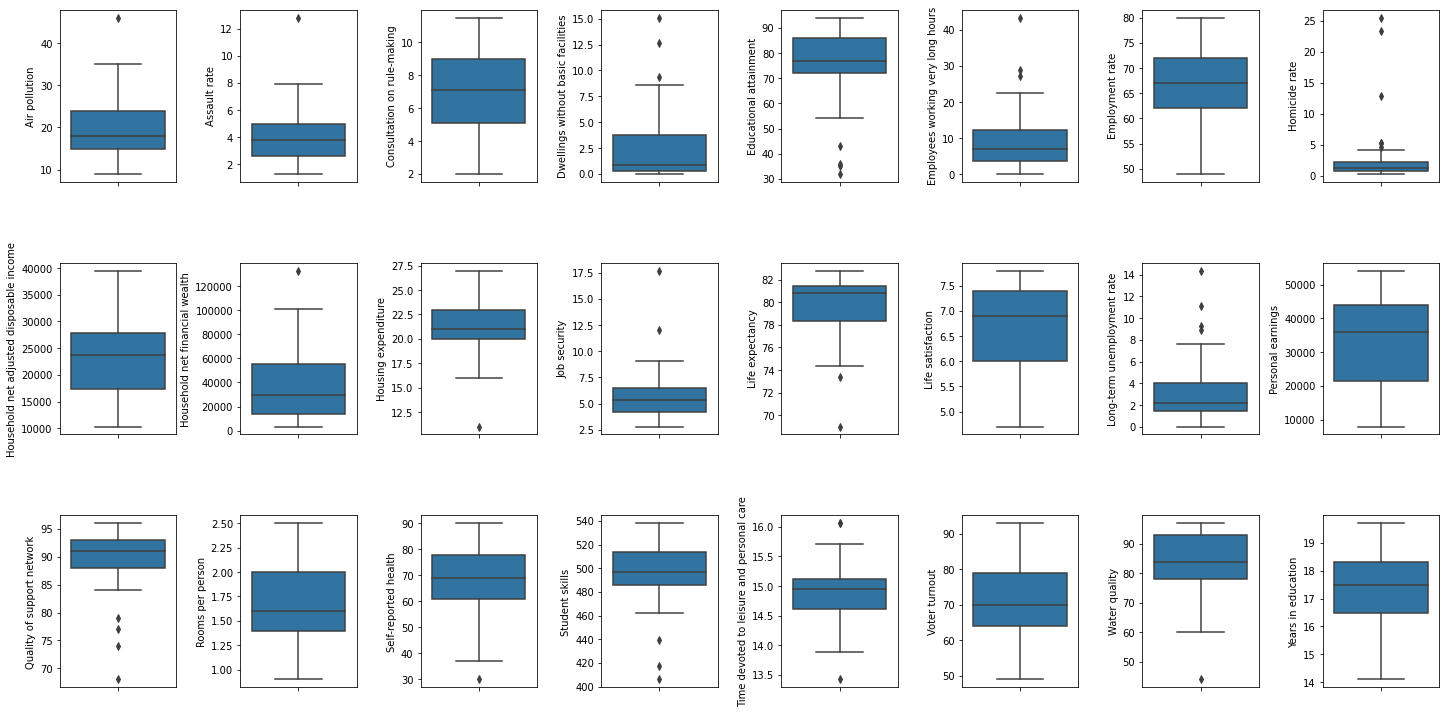

In [ ]:
fig, axs = plt.subplots(ncols=8, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column Air pollution outliers = 2.70%
Column Assault rate outliers = 2.70%
Column Consultation on rule-making outliers = 0.00%
Column Dwellings without basic facilities outliers = 8.11%
Column Educational attainment outliers = 10.81%
Column Employees working very long hours outliers = 8.11%
Column Employment rate outliers = 0.00%
Column Homicide rate outliers = 16.22%
Column Household net adjusted disposable income outliers = 0.00%
Column Household net financial wealth outliers = 2.70%
Column Housing expenditure outliers = 2.70%
Column Job security outliers = 5.41%
Column Life expectancy outliers = 5.41%
Column Life satisfaction outliers = 0.00%
Column Long-term unemployment rate outliers = 10.81%
Column Personal earnings outliers = 0.00%
Column Quality of support network outliers = 10.81%
Column Rooms per person outliers = 0.00%
Column Self-reported health outliers = 2.70%
Column Student skills outliers = 8.11%
Column Time devoted to leisure and personal care outliers = 8.11%
Column V

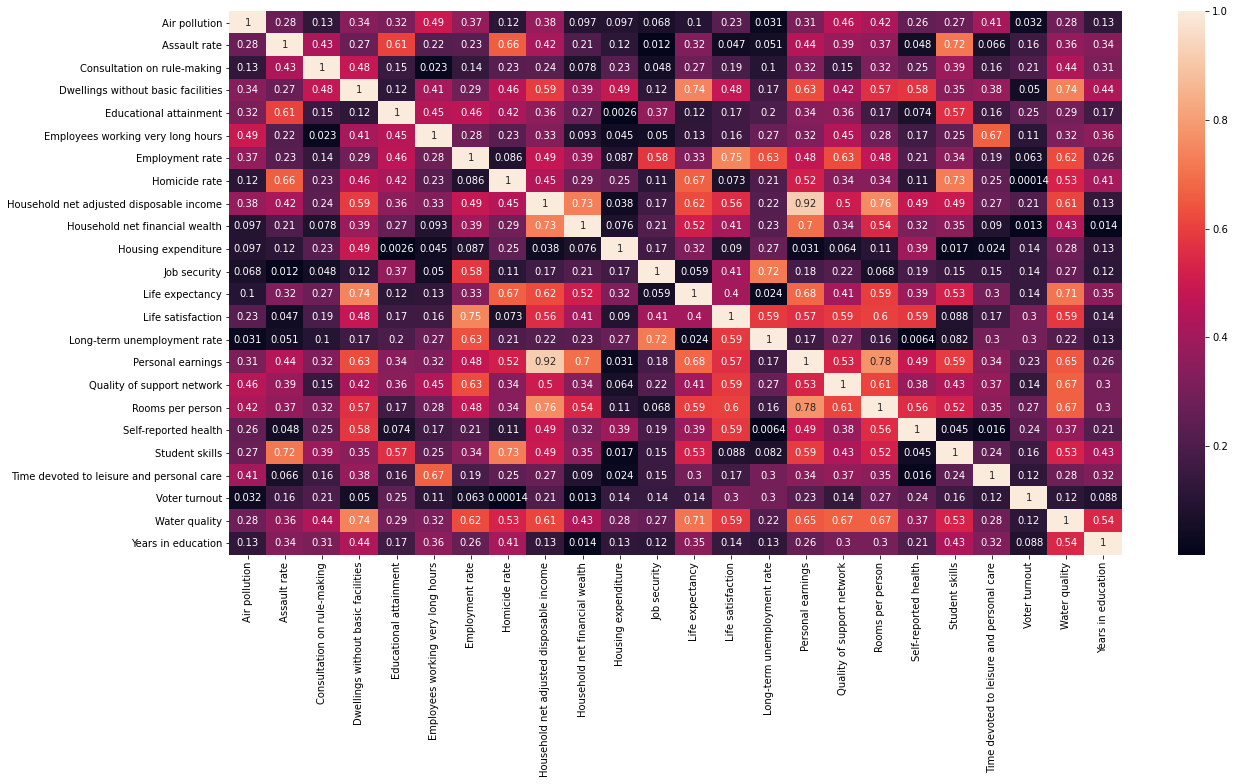

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

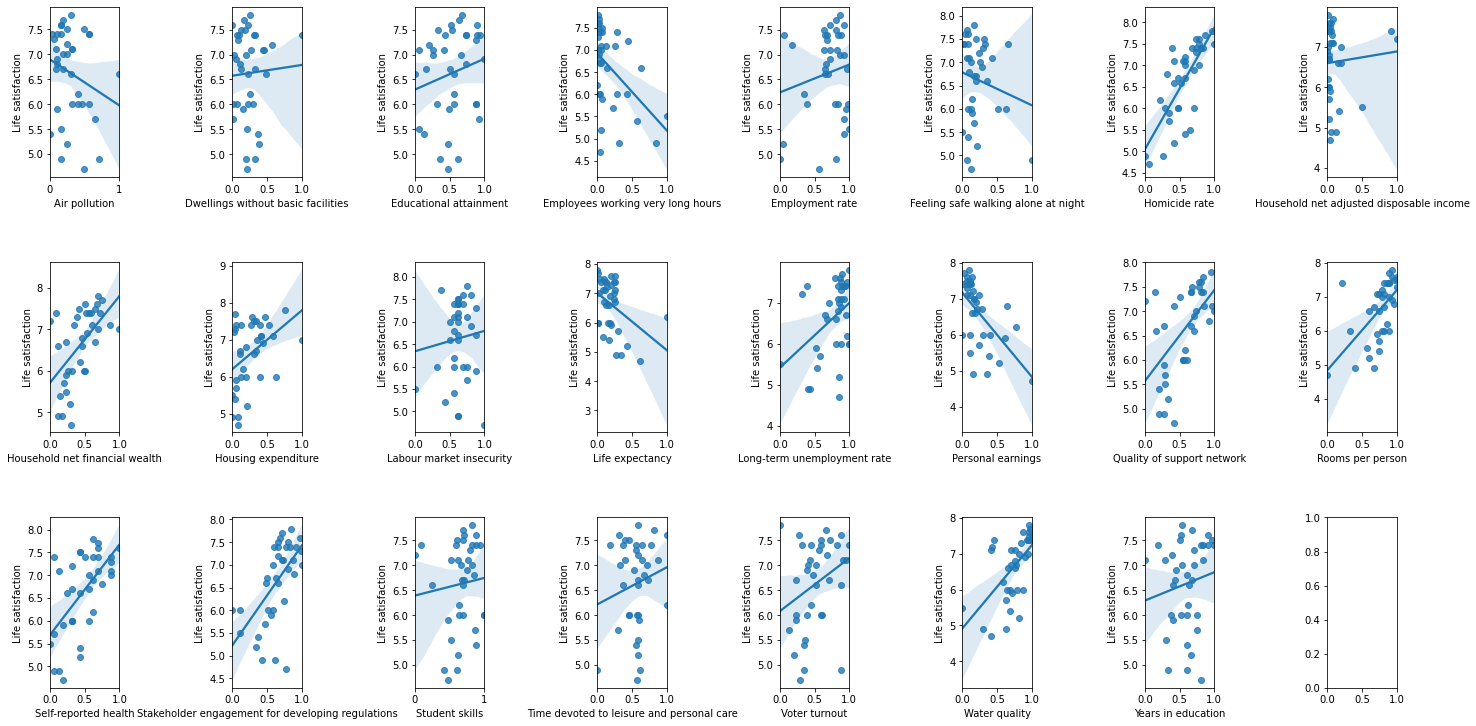

In [ ]:
# Let's scale the columns before plotting them against Life satisfaction
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['Air pollution', 'Dwellings without basic facilities', 'Educational attainment', 'Employees working very long hours', 'Employment rate', 'Feeling safe walking alone at night', 'Homicide rate', 'Household net adjusted disposable income', 'Household net financial wealth', 'Housing expenditure', 'Labour market insecurity', 'Life expectancy', 'Long-term unemployment rate', 'Personal earnings', 'Quality of support network', 'Rooms per person', 'Self-reported health', 'Stakeholder engagement for developing regulations', 'Student skills', 'Time devoted to leisure and personal care', 'Voter turnout', 'Water quality', 'Years in education']
x = df.drop(['Life satisfaction'],axis=1)
y = df['Life satisfaction']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=8, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [ ]:
l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_root_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Scoiring Metrics

# https://scikit-learn.org/stable/modules/model_evaluation.html

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_root_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Lets try polinomial regression with L2 with degree for the best fit

#for degree in range(2, 6):
#    model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
#    scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#    print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_root_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.08 (+/- 0.04)
MSE: -0.06 (+/- 0.02)
MSE: -0.07 (+/- 0.03)


In [ ]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_root_mean_squared_error')
scores_map['SVR'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.08 (+/- 0.03)


In [ ]:
desc_tr = DecisionTreeRegressor(max_depth=5)
#grid_sv = GridSearchCV(desc_tr, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='neg_root_mean_squared_error')
scores_map['DecisionTreeRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.10 (+/- 0.05)


In [ ]:
knn = KNeighborsRegressor(n_neighbors=7)
scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='neg_root_mean_squared_error')
scores_map['KNeighborsRegressor'] = scores
print(scores)
#grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[-0.086 -0.073 -0.066 -0.138 -0.077 -0.092 -0.08  -0.078 -0.05  -0.128]
KNN Accuracy: -0.09 (+/- 0.03)
-0.09 accuracy with a standard deviation of 0.03


In [ ]:
gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
#param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
#grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_root_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.08 (+/- 0.03)


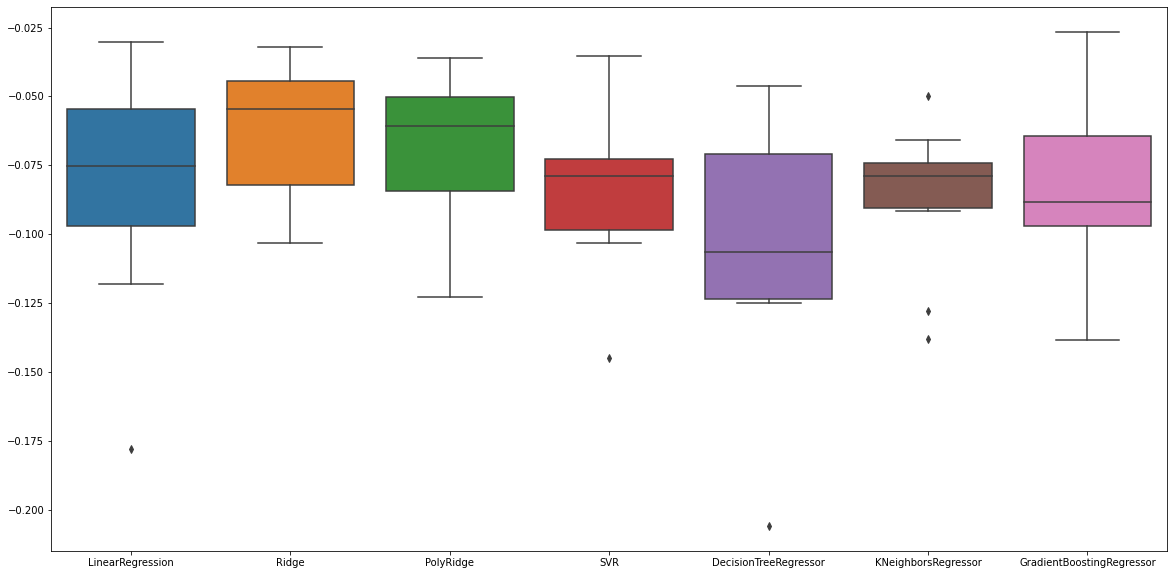

In [ ]:
plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)

In [ ]:
# Looking for nulls
print(df.isnull().any())
# Inspecting type
print(df.dtypes)

Air pollution                                False
Assault rate                                 False
Consultation on rule-making                  False
Dwellings without basic facilities           False
Educational attainment                       False
Employees working very long hours            False
Employment rate                              False
Homicide rate                                False
Household net adjusted disposable income     False
Household net financial wealth               False
Housing expenditure                          False
Job security                                 False
Life expectancy                              False
Life satisfaction                            False
Long-term unemployment rate                  False
Personal earnings                            False
Quality of support network                   False
Rooms per person                             False
Self-reported health                         False
Student skills                 

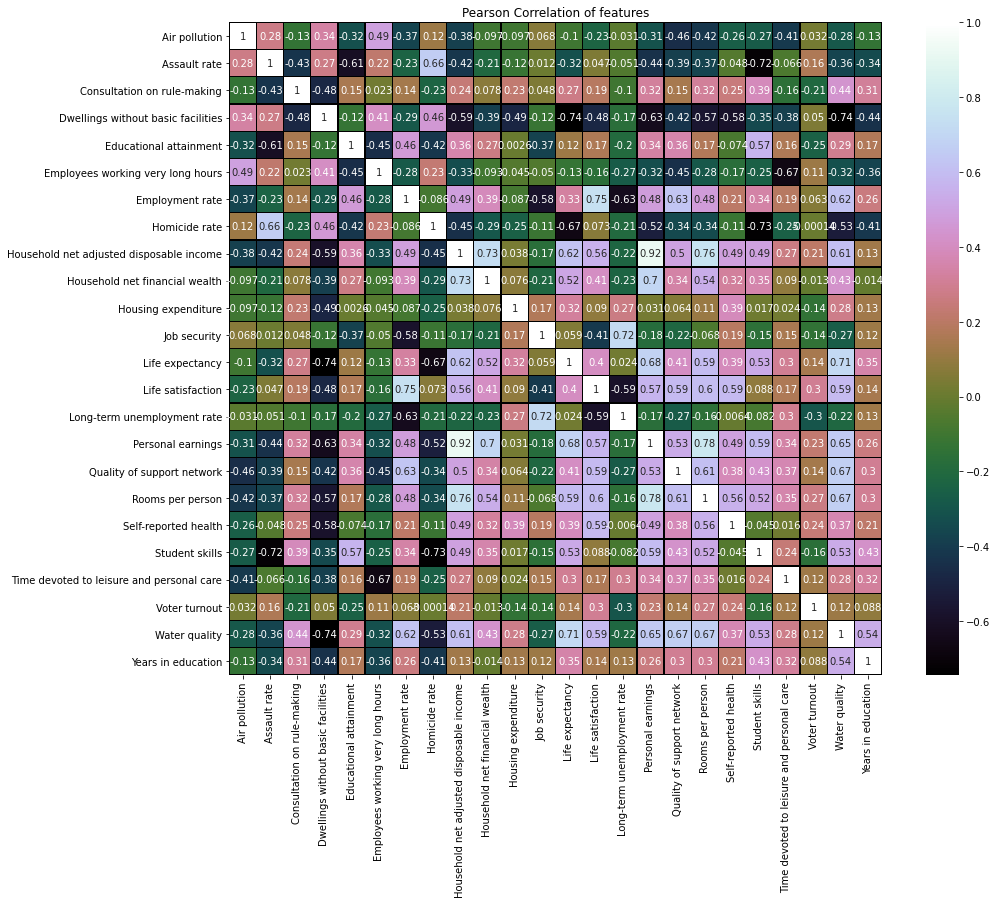

In [ ]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion
num_list = df.columns.difference(str_list)
# Create Dataframe containing only numerical features
house_num = df[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X = df.iloc[:, :-1].values

In [ ]:
y = df.iloc[:, -1].values

In [ ]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [ ]:
colnames =df.drop(columns=['Life satisfaction'])

In [ ]:
# Construct our Linear Regression model
lr = LinearRegression(normalize=True)
lr.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [ ]:
# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge
ridge = Ridge(alpha = 7)
ridge.fit(X,y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

In [ ]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50building tree 10 of 50
building tree 11 of 50

building tree 12 of 50building tree 13 of 50

building tree 14 of 50
building tree 15 of 50building tree 16 of 50
building tree 17 of 50

building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50building tree 22 of 50

building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

In [ ]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name]
                             for method in ranks.keys()]), 24)

methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str,
                         [ranks[method][name] for method in methods]))))

	Lasso	LinReg	RF	RFE	Ridge	Mean
Air pollution	0.14	0.01	0.17	0.36	0.14	0.164
Assault rate	0.81	0.13	0.12	0.41	0.77	0.44800000000000006
Consultation on rule-making	0.0	0.01	0.41	0.23	0.16	0.162
Dwellings without basic facilities	0.53	0.02	0.48	0.32	0.65	0.4
Educational attainment	0.05	0.01	0.05	0.18	0.04	0.066
Employees working very long hours	0.4	0.02	0.52	0.14	0.25	0.266
Employment rate	0.51	0.03	0.1	0.64	0.45	0.346
Homicide rate	0.0	0.04	0.82	0.73	0.11	0.34
Household net adjusted disposable income	0.0	0.0	0.33	0.09	0.0	0.084
Household net financial wealth	0.0	0.0	0.21	0.0	0.0	0.041999999999999996
Housing expenditure	0.61	0.06	0.0	0.27	0.54	0.296
Job security	1.0	0.06	0.12	0.91	0.77	0.5720000000000001
Life expectancy	0.79	0.07	0.1	0.77	0.82	0.51
Long-term unemployment rate	0.0	0.08	0.06	0.86	0.33	0.266
Personal earnings	0.34	0.05	0.24	0.59	0.37	0.318
Quality of support network	0.0	0.0	0.34	0.05	0.0	0.078
Rooms per person	0.7	0.06	0.16	0.68	0.54	0.428
Self-reported health	0.0	1.0	0.09	

In [ ]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

In [ ]:
# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


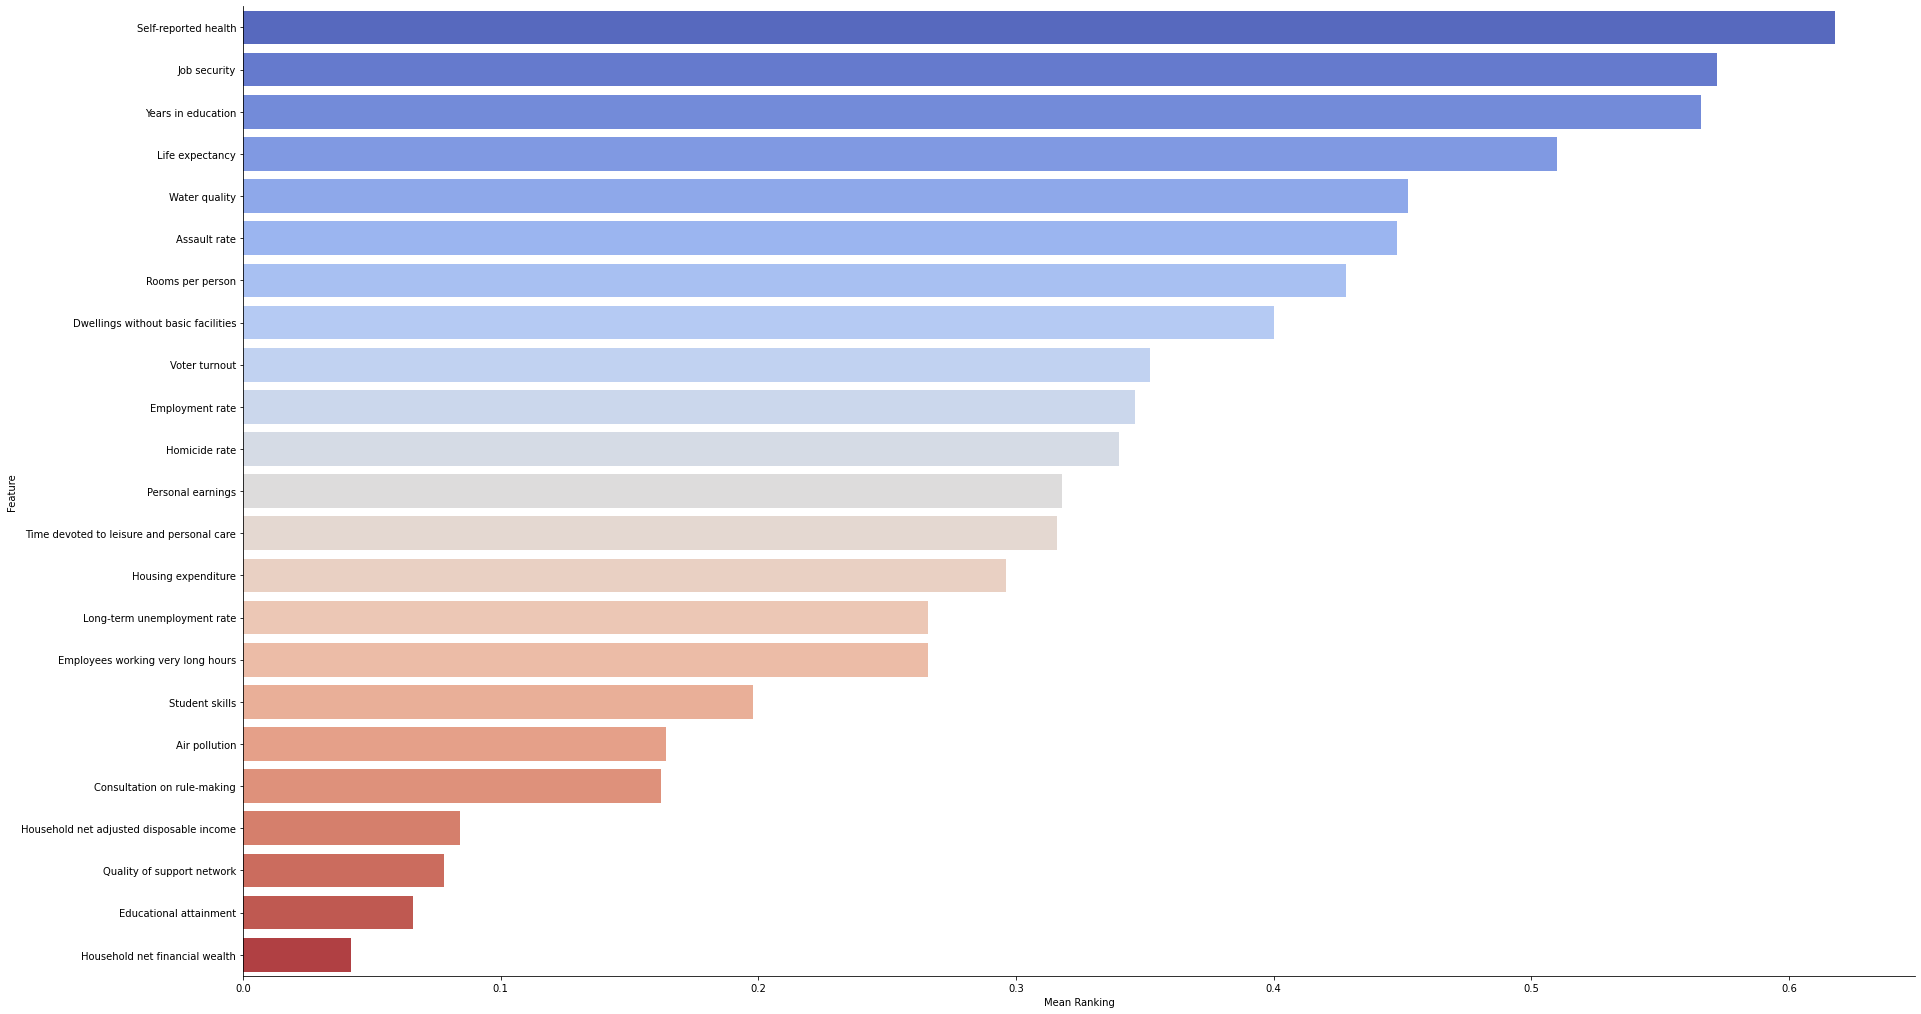

In [ ]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar",
               size=14, aspect=1.9, palette='coolwarm')

In [ ]:
# evaluate RFE for regression
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -1.276 (0.491)
